In [3]:
import numpy as np
import pandas as pd




In [30]:
from sklearn.datasets import load_wine

load= load_wine()
load.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [36]:
df = pd.DataFrame(data=load.data,columns=load.feature_names)
df['target'] = load['target']
df['class'] = df['target'].map(lambda ind: load['target_names'][ind])

In [37]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [38]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null int32
class                           178 non-null object
dtypes: float64(13), int32(1), object(1)
memory usage: 20.2+ KB


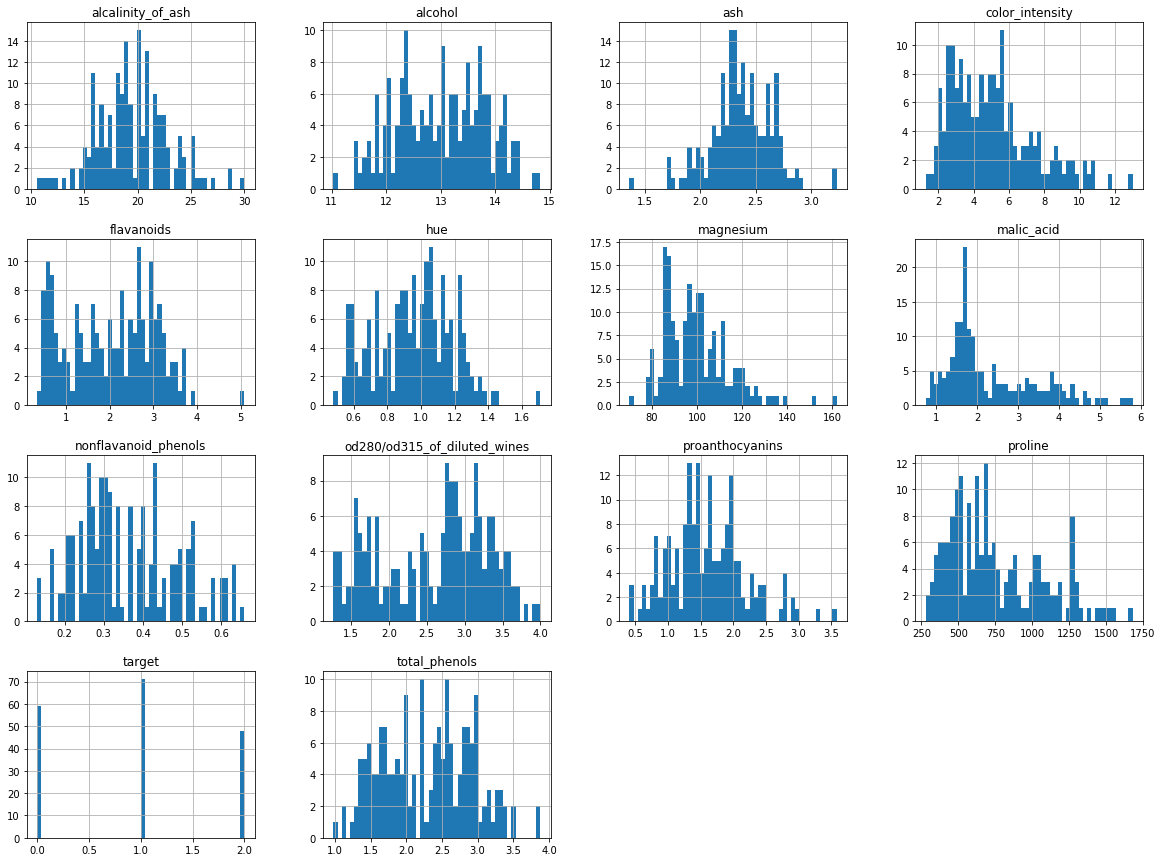

In [41]:
%matplotlib inline
# frequency plot
import matplotlib.pyplot as plt
df.hist(bins = 50, figsize = (20,15))
plt.show()

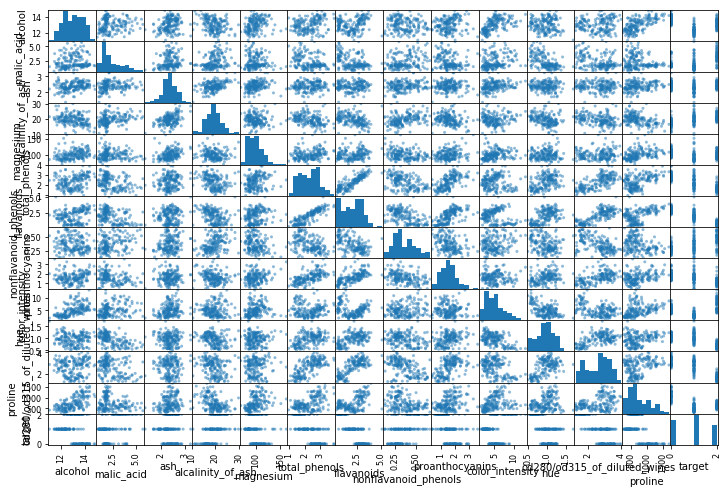

In [43]:
from pandas.plotting import scatter_matrix

# Can select attributes we are interested
#attributes = ["age", "sex", "cp","chol"]
scatter_matrix(df, figsize=(12, 8))
plt.show()

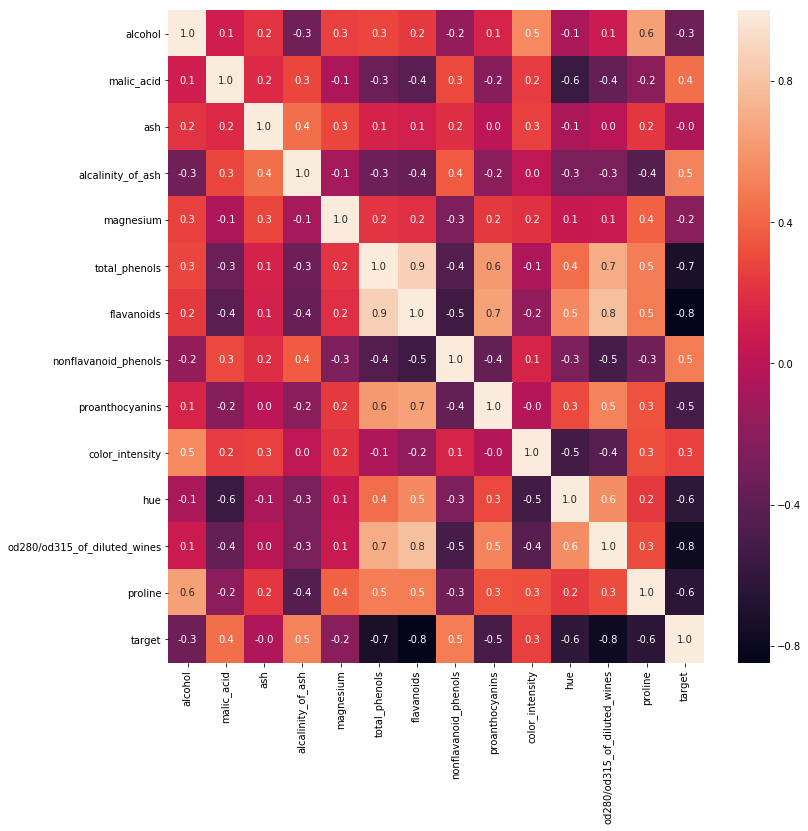

In [45]:
import seaborn as sn

# plot correlation matrix
plt.figure(figsize=(12, 12))
sn.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

In [63]:
y_dataset = np.array(df['target'])
X_dataset = df.drop(labels = ['target','class'],axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_dataset_scaled = scaler.fit_transform(X_dataset)


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dataset_scaled, y_dataset, test_size = 0.20, random_state = 42)

In [66]:
X_train

array([[0.87105263, 0.18577075, 0.71657754, ..., 0.07317073, 0.25274725,
        0.2724679 ],
       [0.39473684, 0.94268775, 0.68449198, ..., 0.27642276, 0.15384615,
        0.16904422],
       [0.35263158, 0.06521739, 0.39572193, ..., 0.45528455, 0.54945055,
        0.2724679 ],
       ...,
       [0.88157895, 0.22332016, 0.54545455, ..., 0.58536585, 0.63369963,
        0.90513552],
       [0.43684211, 0.15612648, 0.48128342, ..., 0.3902439 , 0.28937729,
        0.15477889],
       [0.34473684, 0.33794466, 0.58823529, ..., 0.2601626 , 0.77289377,
        0.11412268]])

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=5)
forest_scores.mean()

0.9785714285714286

In [69]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
forest_clf.score(X_test,y_test)

1.0

In [73]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(forest_clf, X_train, y_train, train_sizes=[50, 80, 110], cv=5)